## (2.5) SVM und das XOR-Problem <span style="color:green; font-size:1em">(o)</span> <span style="font-size:1em">&#x1F4D7;</span>

In dieser Aufgabe generieren Sie schrittweise das kanonische XOR-Problem (das Entweder-Oder-Problem), dass durch eine einfache logistische Regression nicht lösbar ist. Das XOR-Problem lässt sich auch verstehen als ein sogenanntes *Gaussian Mixture Model*, in dem die Daten einer Summe verschiedener Normalverteilungen mit verschiedenen Positionen entstammen. Die Generierung der Daten wird von der Funktion `get_xor_data` in der begleitenden Python-File `utils_svm.py` für Sie übernommen.

**<span style="color:green; font-size:2em"> (a) </span>** <span style="font-size:2em">&#x1F4D7;</span> Erstellen Sie einen Trainingsdatensatz mit $200$ Datenpunkten mit der Funktion `get_xor_data` und plotten Sie die Datenpunkte, indem Sie sie entsprechend ihrer Klasse (hier: $y_T^{(i)} \in \{-1, +1\}$) einfärben. Warum kann das Problem nicht durch eine logistische Regression gelöst werden?

**<span style="color:green; font-size:2em"> (b) </span>** <span style="font-size:2em">&#x1F4D9;</span> Benutzen Sie die in Scikit-Learn verfügbare SVM-Implementation und trainieren Sie ein Modell mit den Default-Parametern und dem *Radial Basis Function*-Kernel (`kernel='rbf'`). Plotten Sie die Entscheidungsgrenze des Modells (etwa mit `plt.contour` oder durch eine in vorherigen Tutorials bereitgestellte Funktion).

**<span style="color:green; font-size:2em"> (c) </span>** <span style="font-size:2em">&#x1F4D7;</span> Erzeugen Sie einen Testdatensatz mit weiteren $200$ Datenpunkten und berechnen Sie die Korrekt-Klassifikationsrate (auch *accuracy* genannt) auf den Testdaten.

**<span style="color:orange; font-size:2em"> (d) </span>** <span style="font-size:2em">&#x1F4D9;</span> Teilen Sie nun ihren Trainingsdatensatz in zwei Datensätze mit einmal $160$ und einmal $40$ Datenpunkten. Den kleineren Datensatz nennen wir den Validierungsdatensatz. Variieren Sie nun die Werte für die Parameter $C$ und $\gamma$ der SVM auf einer logarithmischen Skala:

$$
C \in \{ 2^{-6}, 2^{-4}, ..., 2^{10}\}
$$
$$
\gamma \in \{ 2^{-5}, 2^{-3}, ..., 2^9\}
$$

und trainieren Sie für jede Kombination eine SVM auf den verbliebenen $160$ Trainingsdatenpunkten. Evaluieren Sie jedes Modell auf dem Validierungsdatensatz. Plotten Sie eine *heatmap* des Ergebnisses. Finden Sie so die beste Kombination der Werte für $C$ und $\gamma$.

**<span style="color:green; font-size:2em"> (e) </span>** <span style="font-size:2em">&#x1F4D9;</span> Trainieren Sie nun eine SVM mit den besten Werten der Hyperparameter aus der vorherigen Aufgabe auf dem kompletten ursprünglichen Trainingsdatensatz mit $200$ Datenpunkten. Validieren Sie das Modell auf dem Testdatensatz und vergleichen Sie mit dem Ergebnis aus **a)**.


In [1]:
# um die begleitende Datei utils_svm.py auf diese Weise zu importieren,
# laden Sie sie zunächst aus dem Datenaustausch herunter und platzieren
# Sie sie am besten genau in dem Ordner, in dem Sie dieses Notebook gespeichert haben
import utils_svm
import numpy as np
import matplotlib.pyplot as plt

from sklearn.svm import SVC

### a)

In [2]:
X, y = utils_svm.get_xor_data(n_samples=200)

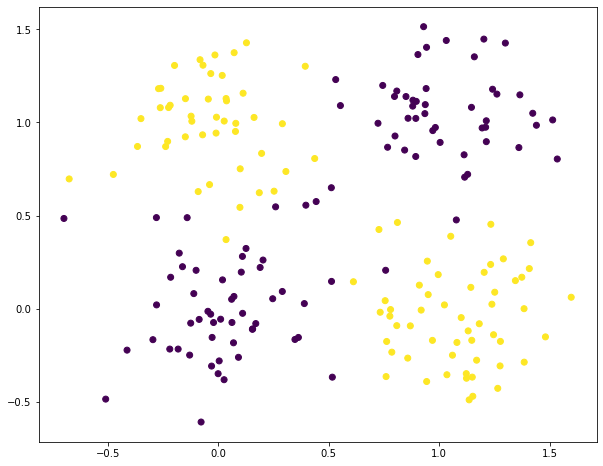

In [3]:
# Die Klassen sind nicht linear separierbar, deswegen würde eine (lineare) logistische Regression
# keine Entscheidungsgrenze lernen können. Eventuell kann eine Feature Expansion aber Abhilfe schaffen.

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)

### b)

In [4]:
# SVM mit rbf-Kernel
svm = SVC(kernel="rbf")
# Training zunächst auf allen Daten
svm.fit(X, y)

SVC()

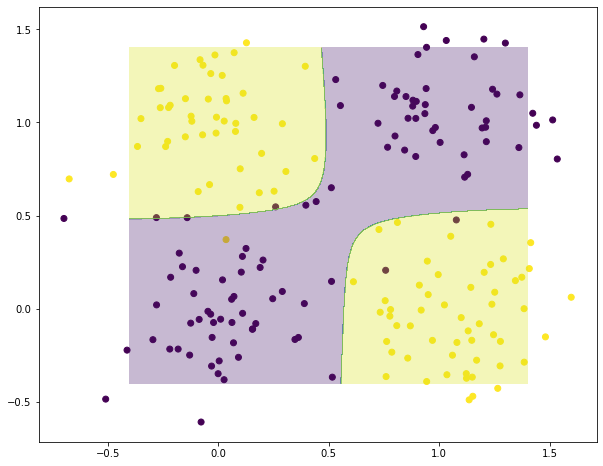

In [5]:
# manuell geplottete Entscheidungsgrenze

n_linspace = 1000
x1 = np.linspace(-0.4, 1.4, n_linspace)
x2 = np.linspace(-0.4, 1.4, n_linspace)

X1, X2 = np.meshgrid(x1, x2)

# diese Matrix sollte das Format [n_samples, 2] haben, um mit der predict-Funktion des Modells
# zu funktionieren, wobei n_samples = n_linspace**2 gilt.
XX = np.stack((X1.flatten(), X2.flatten()), axis=1)

# erst predict, dann reshape in das gleiche Format wie X1 und X2
YY = svm.predict(XX).reshape((n_linspace, n_linspace))

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.contourf(X1, X2, YY, alpha=0.3)

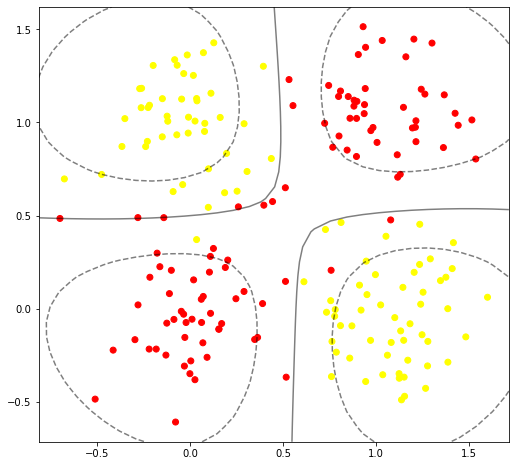

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="autumn")

utils_svm.plot_svc_decision_function(svm, plot_support=False)

## c)

In [8]:
X_test, y_test = utils_svm.get_xor_data(n_samples=200)

In [9]:
y_pred = svm.predict(X_test)

accuracy = (y_pred == y_test).sum() / len(y_test)
accuracy

0.95

### d)

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=80)

In [18]:
# Alternative 1:
Cs = np.logspace(-6, 10, num=9, base=2.0)
gammas = np.logspace(-5, 9, num=7, base=2.0)

# Alternative 2:
Cs = 2.0 ** np.arange(-6, 10, 2)
gammas = 2.0 ** np.arange(-5, 9, 2)

In [19]:
def accuracy(C, gamma):
    model = SVC(C=C, gamma=gamma, kernel="rbf")
    model.fit(X_train, y_train)
    
    # Vorhersage auf den Validierungsdaten
    y_pred = model.predict(X_valid)
    
    acc = (y_pred == y_valid).sum() / len(y_valid)
    return acc

In [20]:
all_accuracies = np.zeros((len(Cs), len(gammas)))

for i, C in enumerate(Cs):
    for j, gamma in enumerate(gammas):
        all_accuracies[i, j] = accuracy(C, gamma)

In [21]:
all_accuracies

array([[0.46666667, 0.46666667, 0.46666667, 0.46666667, 0.46666667,
        0.46666667, 0.46666667],
       [0.46666667, 0.46666667, 0.46666667, 0.775     , 0.58333333,
        0.46666667, 0.46666667],
       [0.46666667, 0.46666667, 0.85      , 0.95      , 0.96666667,
        0.84166667, 0.46666667],
       [0.46666667, 0.50833333, 0.91666667, 0.95833333, 0.95833333,
        0.93333333, 0.83333333],
       [0.46666667, 0.85833333, 0.93333333, 0.95833333, 0.95      ,
        0.9       , 0.84166667],
       [0.63333333, 0.90833333, 0.95      , 0.94166667, 0.91666667,
        0.9       , 0.84166667],
       [0.825     , 0.93333333, 0.96666667, 0.95      , 0.9       ,
        0.9       , 0.84166667],
       [0.90833333, 0.95833333, 0.95833333, 0.93333333, 0.9       ,
        0.9       , 0.84166667]])

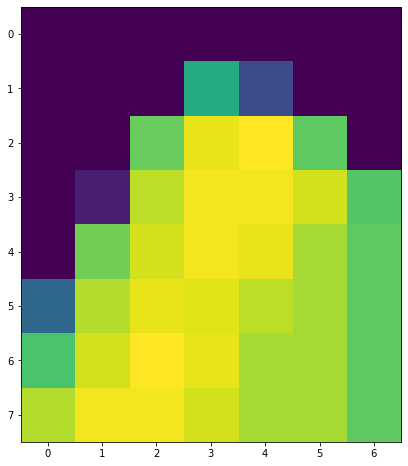

In [22]:
plt.figure(figsize=(8, 8))
plt.imshow(all_accuracies)

In [23]:
# Dies würde den beste Index nicht der Matrix, sondern des aus der Matrix entstandenen
# Vektors (flattened) zurückgeben.
# best_index = np.argmax(all_accuracies)

# Die Funktion np.unravel_index kann den entsprechenden Index in denjenigen 2D-Index
# umwandeln, der der ursprünglichen Matrix entsprochen hätte
best_index = np.unravel_index(np.argmax(all_accuracies), (len(Cs), len(gammas)))

In [24]:
best_accuracy = all_accuracies[best_index]
best_accuracy

0.9666666666666667

In [25]:
best_C = Cs[best_index[0]]
best_gamma = gammas[best_index[1]]

### e)

In [26]:
# X, y sind die kompletten Trainingsdaten
best_svm = SVC(C=best_C, gamma=best_gamma, kernel="rbf")
best_svm.fit(X, y)

y_pred = best_svm.predict(X_test)

# Die finale Genauigkeit kann geringer ausfallen als die beste Accuracy auf den Validierungsdaten
final_accuracy = (y_pred == y_test).sum() / len(y_pred)
final_accuracy

0.97